In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Activation, Input, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

import tensorflow as tf


from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping

import gensim

In [2]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11736       11736  possible have satpathy ask question the questi...   
11737       11737                              god that was thorough   
11738       11738                      thread and meat kaun jat bhai   
11739       11739     not touch food with your left hand left handed   
11740       11740                     they say because they care for   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [4]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              
                             25%      50%       75%      max  
Mental_State                                                  
Addiction                 249.25    498.5    747.75    997.0  
Alcoholism               1247.50   1497.0   1746.50   1996.0  
Anxiety                  2252.75   2508.5   2764.25   3020.0  
Aspergers                3316.50   3516.0   3715.50   3915.0  
Bipolar                  4171.75   4427.5   4683.25   4939.0  
Borderline Personality   5464.75   5720.5   5976.25   6232.0  
Depression               6762.75   7018.5   7274.25   7530.0  
Schizophernia            7893.75   8149.5   8405.25   8661.0  
SelfHarm                 8958.25   9144.5   9331.75   9518.0  
Suidal Thought           9774.75  10030.5  10286.25  10542.0  
neutral                 10972.75  11228.5  11484.25  11740.0

In [5]:
df.columns

Index(['Unnamed: 0', 'Description', 'Mental_State'], dtype='object')

In [6]:
df.drop(labels='Unnamed: 0', axis=1)

,Description,Mental_State
0,I'm sorry about this post. It's gonna be a who...,Addiction
1,Been getting super high off high amounts of th...,Addiction
2,My brothers been shooting heroin/meth for the ...,Addiction
3,I rlly need an opinion cuz idk bout this stuff...,Addiction
4,Ive smoked weed since 8th grade in middle scho...,Addiction
...,...,...
11736,possible have satpathy ask question the questi...,neutral
11737,god that was thorough,neutral
11738,thread and meat kaun jat bhai,neutral
11739,not touch food with your left hand left handed,neutral


In [7]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11736       11736  possible have satpathy ask question the questi...   
11737       11737                              god that was thorough   
11738       11738                      thread and meat kaun jat bhai   
11739       11739     not touch food with your left hand left handed   
11740       11740                     they say because they care for   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Mental_State_label"] = lb_make.fit_transform(df["Mental_State"])
df[["Mental_State", "Mental_State_label"]].head(11)



,Mental_State,Mental_State_label
0,Addiction,0
1,Addiction,0
2,Addiction,0
3,Addiction,0
4,Addiction,0
5,Addiction,0
6,Addiction,0
7,Addiction,0
8,Addiction,0
9,Addiction,0


In [9]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11736,11736,possible have satpathy ask question the questi...,neutral,10
11737,11737,god that was thorough,neutral,10
11738,11738,thread and meat kaun jat bhai,neutral,10
11739,11739,not touch food with your left hand left handed,neutral,10


In [10]:
df.isnull()

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11736,False,False,False,False
11737,False,False,False,False
11738,False,False,False,False
11739,False,False,False,False


In [11]:
df.dropna(inplace=True)

In [12]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11736,11736,possible have satpathy ask question the questi...,neutral,10
11737,11737,god that was thorough,neutral,10
11738,11738,thread and meat kaun jat bhai,neutral,10
11739,11739,not touch food with your left hand left handed,neutral,10


In [13]:
text = df['Description'].values.tolist()

In [14]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              \
                             25%      50%       75%      max   
Mental_State                                                   
Addiction                 249.25    498.5    747.75    997.0   
Alcoholism               1247.50   1497.0   1746.50   1996.0   
Anxiety                  2252.75   2508.5   2764.25   3020.0   
Aspergers                3316.50   3516.0   3715.50   3915.0   
Bipolar                  4171.75   4427.5   4683.25   4939.0   
Borderline Personality   5464.75   5720.5   5976.25   6232.0   
Depression               6762.75   7018.5   7274.25   7530.0   
Schizophernia            7893.75   8149.5   8405.25   8661.0   
SelfHarm                 8958.25   9144.5   9331.75   9518.0   
Suidal Thought           9774.75  10030.5  10286.25  10542.0   
neutral                 10972.75  11228.5  11484.25  11740.0   

                       Mental_State_label                                     \
                                    count  mean  std   min   25%   50%   75%   
Mental_State                                                                   
Addiction                           998.0   0.0  0.0   0.0   0.0   0.0   0.0   
Alcoholism                          999.0   1.0  0.0   1.0   1.0   1.0   1.0   
Anxiety                            1024.0   2.0  0.0   2.0   2.0   2.0   2.0   
Aspergers                           799.0   3.0  0.0   3.0   3.0   3.0   3.0   
Bipolar                            1024.0   4.0  0.0   4.0   4.0   4.0   4.0   
Borderline Personality             1024.0   5.0  0.0   5.0   5.0   5.0   5.0   
Depression                         1024.0   6.0  0.0   6.0   6.0   6.0   6.0   
Schizophernia                      1024.0   7.0  0.0   7.0   7.0   7.0   7.0   
SelfHarm                            746.0   8.0  0.0   8.0   8.0   8.0   8.0   
Suidal Thought                     1024.0   9.0  0.0   9.0   9.0   9.0   9.0   
neutral                            1024.0  10.0  0.0  10.0  10.0  10.0  10.0   

                              
                         max  
Mental_State                  
Addiction                0.0  
Alcoholism               1.0  
Anxiety                  2.0  
Aspergers                3.0  
Bipolar                  4.0  
Borderline Personality   5.0  
Depression               6.0  
Schizophernia            7.0  
SelfHarm                 8.0  
Suidal Thought           9.0  
neutral                 10.0

In [15]:
df["Mental_State"].value_counts()

Anxiety                   1024
Bipolar                   1024
Borderline Personality    1024
Depression                1024
Schizophernia             1024
Suidal Thought            1024
neutral                   1024
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


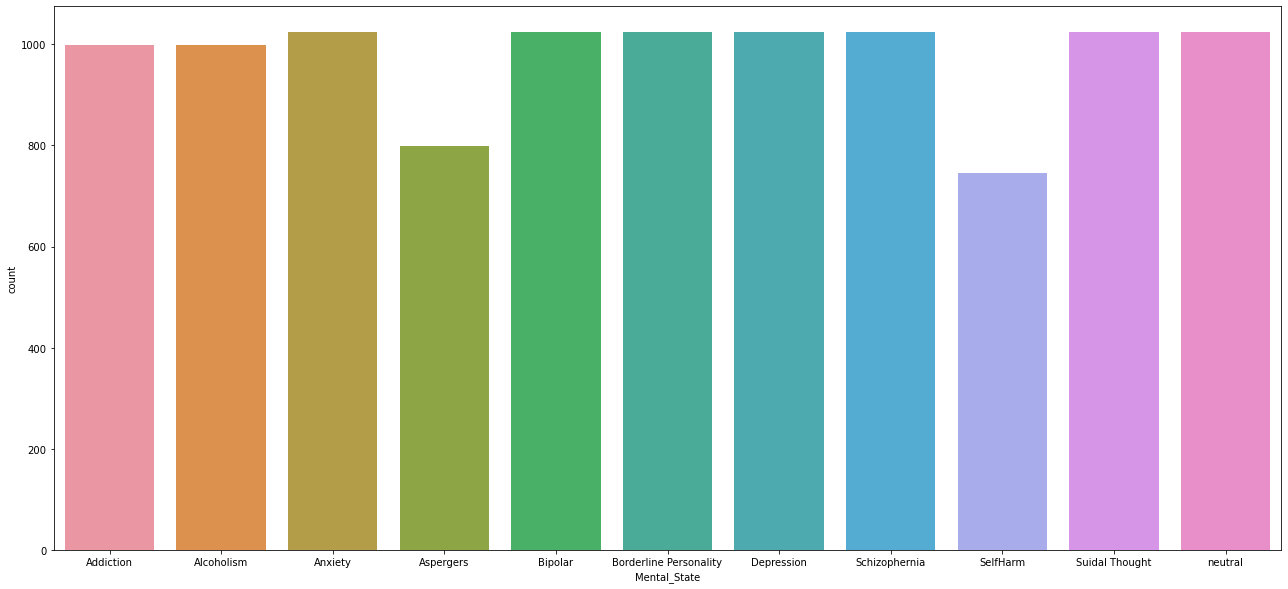

In [16]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [17]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

26163


In [18]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer


In [19]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [20]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

In [21]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(remove_special_characters)

In [22]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on description column
df['Description']=df['Description'].apply(simple_stemmer)

In [23]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Description']=df['Description'].apply(remove_stopwords)

{'now', 'nor', 'when', 'the', 't', 'between', 'is', 'ourselves', 'been', 'any', 'because', "didn't", "isn't", 'over', 'what', 'such', 'that', 'above', 'under', 'in', 'most', 'a', 'here', 'very', 'couldn', 'm', 'yours', 'me', "wasn't", 'there', 'once', "aren't", 'does', 'herself', 'then', 'during', 'ain', 'into', 'no', 'her', 'more', "you'd", "weren't", 'than', 'needn', "couldn't", 'yourselves', 'don', 'an', 'with', "mustn't", 'we', 'i', 'its', "you've", 'their', 'below', 's', 'himself', 'd', 'some', 'your', 'shouldn', 'weren', 'doesn', 'wasn', 'who', 'so', "hasn't", 'but', 'will', 'those', 'ma', 'had', 'where', 'off', 'yourself', 'isn', 'was', 'for', 'his', 'through', 'just', 'are', "don't", 'you', 'they', 'doing', 'theirs', 'y', 'won', 'this', 'hers', "she's", 'these', 'she', 've', 'themselves', 'shan', 'aren', "shan't", 'before', 'too', 'am', 'not', 'having', 'did', 'to', "you're", "haven't", 'mightn', 'while', 'each', "needn't", 'why', 'has', 'should', 'him', 'have', 'hasn', 'how', 

In [24]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

15023


In [25]:
text = df["Description"]

In [26]:
emotion =df["Mental_State"]

In [27]:
print("data shape", df.shape)

data shape (10710, 4)


In [28]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0                                        Description  \
0               0  im sorri thi post gonna whole lot hand wring m...   
1               1  get super high high amount thc edibl stuff eve...   
2               2  brother shoot heroinmeth past 5 year ran away ...   
3               3  rlli need opinion cuz idk bout thi stuff dont ...   
4               4  ive smoke weed sinc 8th grade middl school hoo...   
...           ...                                                ...   
11736       11736  possibl satpathi ask question question hour fi...   
11737       11737                                    god wa thorough   
11738       11738                          thread meat kaun jat bhai   
11739       11739                     touch food left hand left hand   
11740       11740                                    say becaus care   

      Mental_State  Mental_State_label  
0        Addiction                   0  
1        Addiction 

In [29]:
Mental_Class=df.Mental_State.unique()
dic={}
for i,Mental_State in enumerate(Mental_Class):
    dic[Mental_State]=i
labels=df.Mental_State.apply(lambda x:dic[x])
print(labels)

0         0
1         0
2         0
3         0
4         0
         ..
11736    10
11737    10
11738    10
11739    10
11740    10
Name: Mental_State, Length: 10710, dtype: int64


In [30]:
val_data=df.sample(frac=0.2,random_state=200)
train_data=df.drop(val_data.index)

In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [32]:
texts=train_data.Description

In [33]:
NUM_WORDS=20000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(texts)
sequences_valid=tokenizer.texts_to_sequences(val_data.Description)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 18353 unique tokens.


In [34]:
X_train = pad_sequences(sequences_train)
X_val = pad_sequences(sequences_valid,maxlen=X_train.shape[1])
y_train = to_categorical(np.asarray(labels[train_data.index]))
y_val = to_categorical(np.asarray(labels[val_data.index]))
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (8568, 2502) (2142, 2502)
Shape of label train and validation tensor: (8568, 11) (2142, 11)


In [35]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('C:/Users/moshi/Python Code/Vietnam and Indonesia/GoogleNews-vectors-negative300.bin', binary=True)

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)
print(embedding_matrix.shape)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

(18354, 300)


In [36]:
from keras.layers import Embedding
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)

embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM)

In [37]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
sequence_length = X_train.shape[1]
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5
act= "swish"

In [38]:
inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation=act,kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation=act,kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv2D(num_filters, (filter_sizes[2], EMBEDDING_DIM),activation=act,kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)
maxpool_2 = MaxPooling2D((sequence_length - filter_sizes[2] + 1, 1), strides=(1,1))(conv_2)

merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((3*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
output = Dense(units=11, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)

# this creates a model that includes
model = Model(inputs, output)

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2502)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 2502, 300)    5506200     ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 2502, 300, 1  0           ['embedding_1[0][0]']            
                                )                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 2500, 1, 100  90100       ['reshape[0][0]']            

In [40]:
adam = Adam(lr=1e-3)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

C:\Users\moshi\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [41]:
checkpoint_filepath = './Checkpoint/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='test_accuracy',
    mode='max',
    save_best_only=True)

In [42]:
history = model.fit(X_train, y_train, epochs=35, verbose=1, validation_data=(X_val, y_val), batch_size=64,callbacks=[model_checkpoint_callback]) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/35
134/134 [==============================] - 392s 3s/step - loss: 2.3621 - acc: 0.3064 - val_loss: 2.0842 - val_acc: 0.3800
Epoch 2/35
134/134 [==============================] - 395s 3s/step - loss: 1.9188 - acc: 0.4774 - val_loss: 1.7850 - val_acc: 0.5070
Epoch 3/35
134/134 [==============================] - 398s 3s/step - loss: 1.6967 - acc: 0.5488 - val_loss: 1.6473 - val_acc: 0.5677
Epoch 4/35
134/134 [==============================] - 401s 3s/step - loss: 1.5771 - acc: 0.5997 - val_loss: 1.5766 - val_acc: 0.5976
Epoch 5/35
134/134 [==============================] - 389s 3s/step - loss: 1.4828 - acc: 0.6357 - val_loss: 1.5331 - val_acc: 0.6106
Epoch 6/35
134/134 [==============================] - 387s 3s/step - loss: 1.4074 - acc: 0.6632 - val_loss: 1.4983 - val_acc: 0.6321
Epoch 7/35
134/134 [==============================] - 390s 3s/step - loss: 1.3437 - acc: 0.6814 - val_loss: 1.4880 - val_acc: 0.6307
Epoch 8/35
134/134 [==============================] - 382s 3s/step - 

Epoch 29/35
134/134 [==============================] - 417s 3s/step - loss: 0.7649 - acc: 0.9025 - val_loss: 1.5093 - val_acc: 0.6564
Epoch 30/35
134/134 [==============================] - 420s 3s/step - loss: 0.7580 - acc: 0.9051 - val_loss: 1.5085 - val_acc: 0.6527
Epoch 31/35
134/134 [==============================] - 409s 3s/step - loss: 0.7420 - acc: 0.9099 - val_loss: 1.5328 - val_acc: 0.6517
Epoch 32/35
134/134 [==============================] - 418s 3s/step - loss: 0.7352 - acc: 0.9125 - val_loss: 1.5265 - val_acc: 0.6503
Epoch 33/35
134/134 [==============================] - 386s 3s/step - loss: 0.7222 - acc: 0.9150 - val_loss: 1.5301 - val_acc: 0.6555
Epoch 34/35
134/134 [==============================] - 391s 3s/step - loss: 0.7157 - acc: 0.9173 - val_loss: 1.5404 - val_acc: 0.6447
Epoch 35/35
134/134 [==============================] - 390s 3s/step - loss: 0.7096 - acc: 0.9157 - val_loss: 1.5392 - val_acc: 0.6429
Training Accuracy: 0.9546
Testing Accuracy:  0.6429


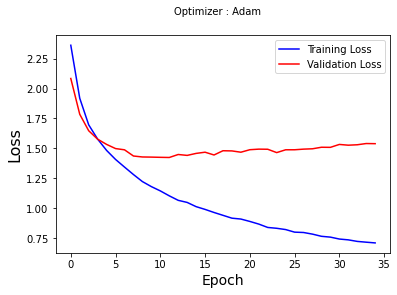

In [43]:
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

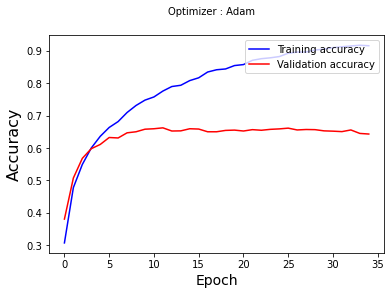

In [44]:
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(history.history['acc'], color='b', label='Training accuracy')
plt.plot(history.history['val_acc'], color='r', label='Validation accuracy')
plt.legend(loc='upper right')

In [45]:
print(f"Best Accuracy Achieved by Model: {max(history.history['val_acc'])}")

Best Accuracy Achieved by Model: 0.6619981527328491


In [46]:
predict = model.predict(X_val)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

array([ 5,  1,  9, ...,  4, 10,  2], dtype=int64)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(val_data["Mental_State_label"], predict_class, target_names =["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
                                "Alcoholism","Addiction","Aspergers","SelfHarm "]))

                        precision    recall  f1-score   support

               Anxiety       0.76      0.69      0.72       200
               Bipolar       0.77      0.84      0.80       204
Borderline Personality       0.67      0.62      0.65       220
           Depression        0.70      0.67      0.69       177
         Schizophernia       0.79      0.69      0.74       220
        Suidal Thought       0.67      0.65      0.66       195
               neutral       0.29      0.35      0.32       203
            Alcoholism       0.82      0.66      0.73       196
             Addiction       0.72      0.61      0.66       132
             Aspergers       0.36      0.44      0.40       203
             SelfHarm        0.72      0.86      0.78       192

              accuracy                           0.64      2142
             macro avg       0.66      0.64      0.65      2142
          weighted avg       0.66      0.64      0.65      2142

